<a href="https://colab.research.google.com/github/rafe-zmn/ecg-classification/blob/main/notebooks/ecg_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [ ]:
train_path = '/content/drive/MyDrive/Thesis/Data/train'
test_path = '/content/drive/MyDrive/Thesis/Data/test'

In [ ]:
label_dict = {
    'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
    'ECG Images of Patient that have History of MI (172x12=2064)': 1,
    'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
    'Normal Person ECG Images (284x12=3408)': 3
}

In [ ]:
def load_data(path, label_dict):
    data = []
    label = []
    for cat, label_value in label_dict.items():
        pic_list = os.path.join(path, cat)
        for img in os.listdir(pic_list):
            image_path = os.path.join(pic_list, img)
            image = cv2.imread(image_path)
            if image is None:
                continue
            if len(image.shape) == 2:
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
            else:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            data.append(image)
            label.append(label_value)
    return np.array(data), np.array(label)

In [ ]:
data, label = load_data(train_path, label_dict)
data = data.astype('float32') / 255.0
num_classes = len(label_dict)
label = to_categorical(label, num_classes)

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(train_data, train_label, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.2890 - loss: 1.3825 - val_accuracy: 0.3020 - val_loss: 1.3773
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.3113 - loss: 1.3752 - val_accuracy: 0.3020 - val_loss: 1.3773
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3170 - loss: 1.3737 - val_accuracy: 0.3020 - val_loss: 1.3748
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.2960 - loss: 1.3726 - val_accuracy: 0.3020 - val_loss: 1.3716
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2866 - loss: 1.3766 - val_accuracy: 0.3020 - val_loss: 1.3687
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.3163 - loss: 1.3669 - val_accuracy: 0.3020 - val_loss: 1.3684
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.2936 - loss: 1.3649 - val_accuracy: 0.3020 - val_loss: 1.3604
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.3175 - loss: 1.3499 - val_accuracy: 0.3020 - val_loss:

In [ ]:
test_data, test_label = load_data(test_path, label_dict)
test_data = test_data.astype('float32') / 255.0
test_label = to_categorical(test_label, num_classes)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_label)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(32, 4), output.shape=(32, 5)

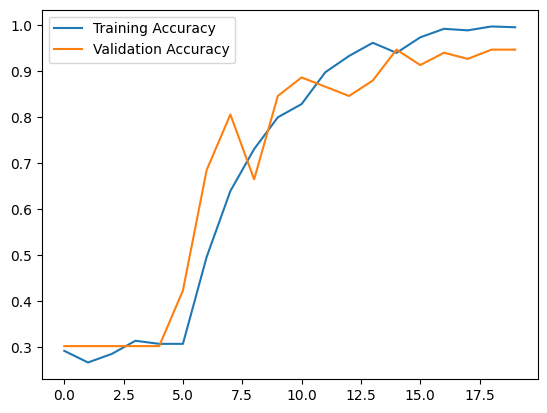

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


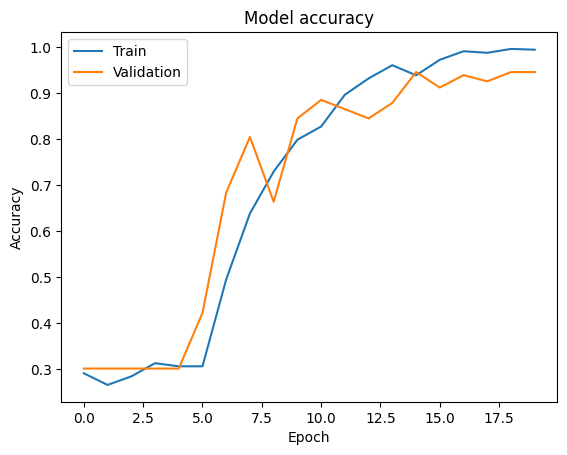

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_true = test_labels  # Replace `test_labels` with your actual test labels variable.
y_pred = model.predict(test_data)  # Replace `test_data` with your test dataset.
y_pred = np.argmax(y_pred, axis=1)  # Use if predictions are probabilities for multi-class tasks.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

test_label_single = np.argmax(test_label, axis=1)
y_pred_single = np.argmax(y_pred, axis=1)

print(confusion_matrix(test_label_single, y_pred_single))
print(classification_report(test_label_single, y_pred_single))


[[112   0   0   0]
 [  6 105   1   0]
 [  8  13  91   0]
 [ 61   0  17  34]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       112
           1       0.89      0.94      0.91       112
           2       0.83      0.81      0.82       112
           3       1.00      0.30      0.47       112

    accuracy                           0.76       448
   macro avg       0.83      0.76      0.74       448
weighted avg       0.83      0.76      0.74       448



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='weighted') * 100
recall = recall_score(y_true, y_pred, average='weighted') * 100
f1 = f1_score(y_true, y_pred, average='weighted') * 100

print(f"Precision: {precision}%, Recall: {recall}%, F1 Score: {f1}%")


NameError: name 'y_true' is not defined

Grad Cam


In [ ]:
import numpy as np
import tensorflow
import tensorflow as tf
from tensorflow import keras
# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

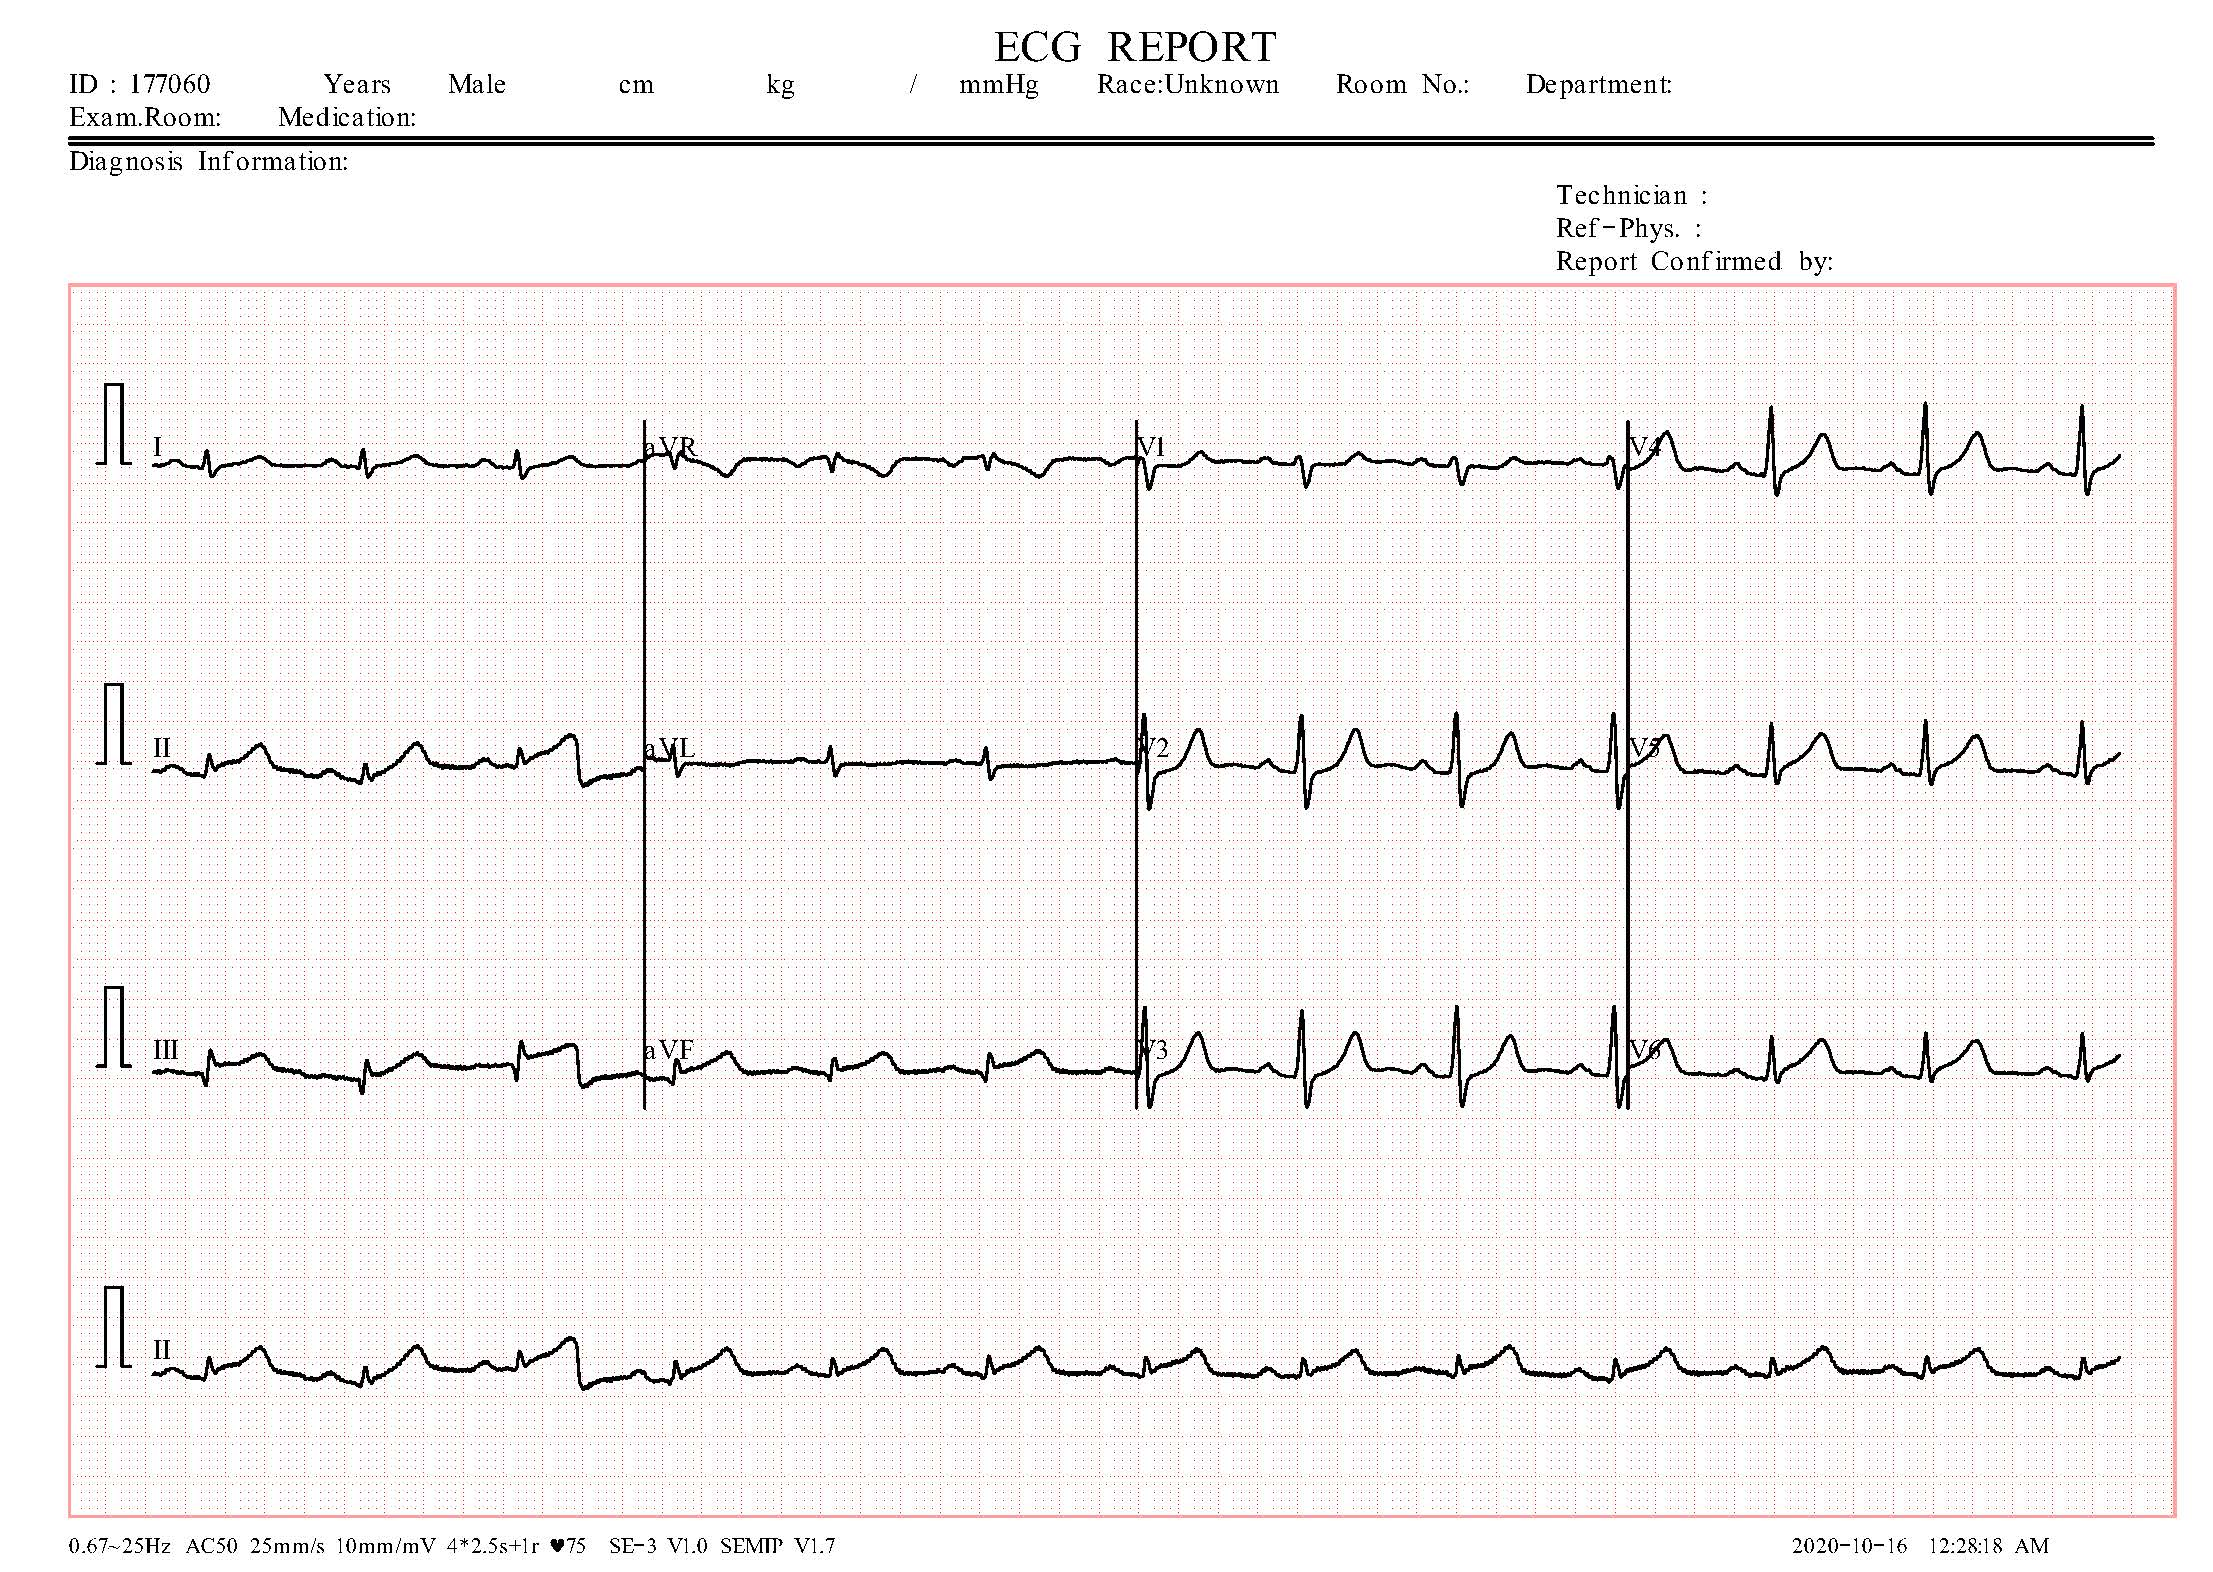

In [ ]:
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.applications.resnet import preprocess_input
decode_predictions = tensorflow.keras.applications.resnet.decode_predictions
img_size = (224, 224)
last_conv_layer_name = "conv5_block3_3_conv"

# The local path to our target image
img_path = keras.utils.get_file( "/content/drive/MyDrive/Thesis/Data/test/ECG Images of Myocardial Infarction Patients (240x12=2880)/test (93).jpg","/content/drive/MyDrive/Thesis/Data/test/ECG Images of Myocardial Infarction Patients (240x12=2880)/test (93).jpg")
display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Predicted: [('n03857828', 'oscilloscope', 14.023653)]


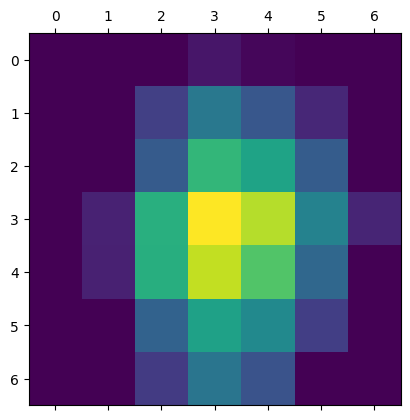

In [ ]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))
model = ResNet152(weights="imagenet")
model.layers[-1].activation = None

preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])
``
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

<ipython-input-25-2530cb619aab>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


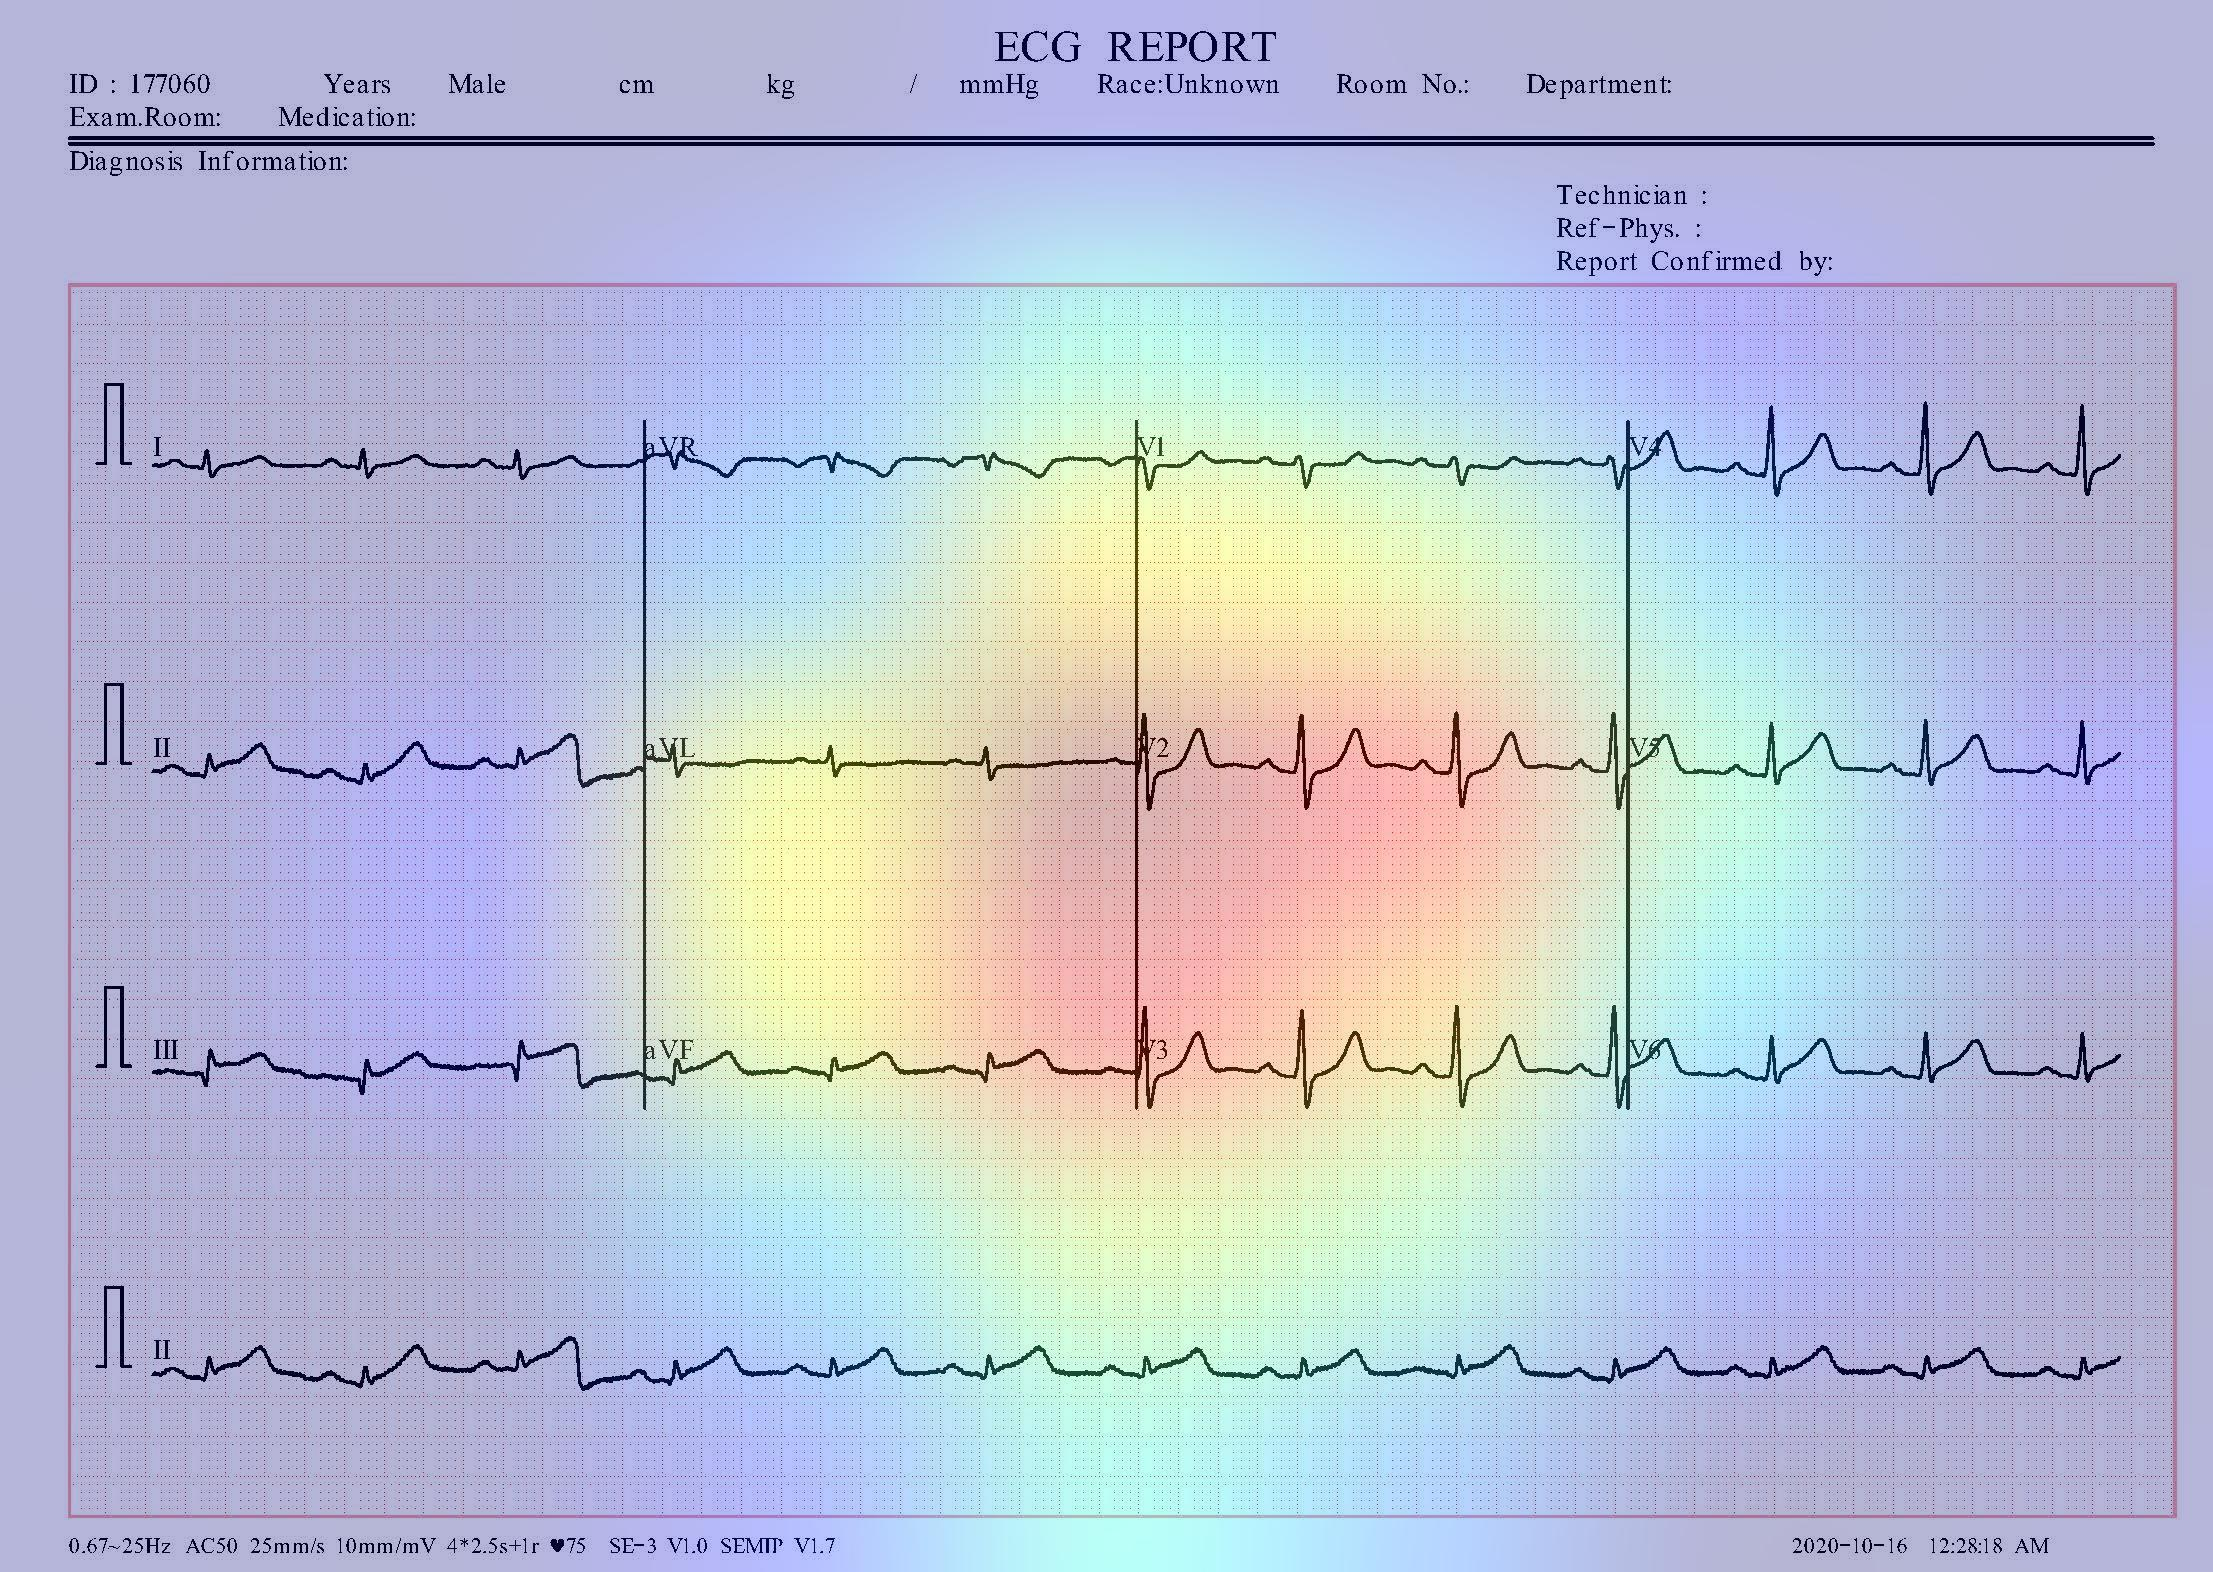

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))
save_and_display_gradcam(img_path, heatmap)

Machine Learning model

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
np.random.seed(1234)

Training data preparation

In [ ]:
path = train_path
img_list = os.listdir(path)
label_dict = {
    'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
    'ECG Images of Patient that have History of MI (172x12=2064)': 1,
    'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
    'Normal Person ECG Images (284x12=3408)': 3
}

data = []
label = []

Load and preprocess images

In [ ]:
for cat in img_list:
    pic_list = os.path.join(path, cat)
    for img in os.listdir(pic_list):
        image_path = os.path.join(pic_list, img)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        data.append(image)
        label.append(label_dict[cat])

data = np.array(data)
label = np.array(label)

Convert labels to one-hot encoding

In [ ]:
from keras.utils import to_categorical
num_classes = 5
label = to_categorical(label, num_classes)

Build the model using EfficientNetB0

In [ ]:
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
model = EfficientNetB0(include_top=True, weights=None, input_shape=(224, 224, 3), classes=num_classes)
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])


In [ ]:
history = model.fit(data, label, batch_size=16, epochs=15, validation_split=0.1)


Epoch 1/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 284s 4s/step - accuracy: 0.3140 - loss: 2.3282 - val_accuracy: 0.0000e+00 - val_loss: 2.4778
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.5811 - loss: 1.1806 - val_accuracy: 0.0000e+00 - val_loss: 3.1627
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 229s 4s/step - accuracy: 0.6723 - loss: 0.8464 - val_accuracy: 0.0000e+00 - val_loss: 3.0748
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.7113 - loss: 0.8034 - val_accuracy: 0.0000e+00 - val_loss: 3.7999
Epoch 5/15
 8/53 ━━━━━━━━━━━━━━━━━━━━ 3:09 4s/step - accuracy: 0.8253 - loss: 0.4746

KeyboardInterrupt: 

In [ ]:
#Testing data preparation
path_test = test_path
img_list_test = os.listdir(path_test)
data_test = []
label_test = []

for cat in img_list_test:
    pic_list = os.path.join(path_test, cat)
    for img in os.listdir(pic_list):
        image_path = os.path.join(pic_list, img)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        data_test.append(image)
        label_test.append(label_dict[cat])

data_test = np.array(data_test)
label_test = np.array(label_test)
label_test = to_categorical(label_test, num_classes)

# Evaluate the model
_, acc = model.evaluate(data_test, label_test)
print(f"Test Accuracy: {acc * 100:.2f}%")
print("Test Result: Data, label")



14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7144 - loss: 0.9068
Test Accuracy: 87.50%


In [ ]:
custom_accuracy = test_accuracy
efficient_accuracy = acc

Accuracy Comparison:
EfficientNet Accuracy: 0.88
Custom CNN Accuracy: 0.98


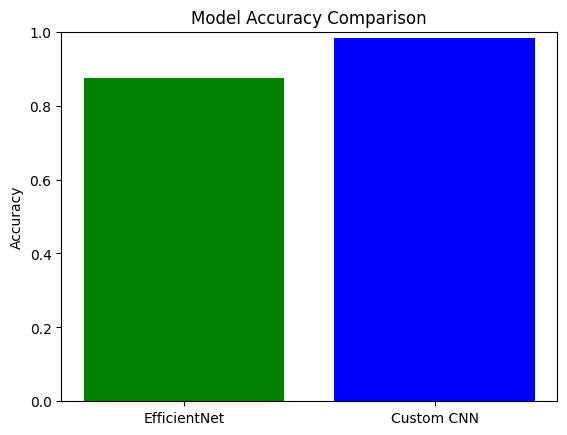

In [ ]:
# Accuracy Comparison
print("Accuracy Comparison:")
print(f"EfficientNet Accuracy: {efficient_accuracy:.2f}")
print(f"Custom CNN Accuracy: {custom_accuracy:.2f}")


# Visualize Comparison
models = ['EfficientNet', 'Custom CNN']
accuracies = [efficient_accuracy, custom_accuracy]


plt.bar(models, accuracies, color=['green', 'blue'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

other model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def load_data(path, label_dict):
    data = []
    label = []
    for cat, label_value in label_dict.items():
        pic_list = os.path.join(path, cat)
        for img in os.listdir(pic_list):
            image_path = os.path.join(pic_list, img)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            data.append(image)
            label.append(label_value)
    return np.array(data), np.array(label)


In [ ]:
data,label = load_data(train_path,label_dict)
data=data.astype('float32')/255.0
num_classes=len(label_dict)
label=keras.utils.to_categorical(label,num_classes)

# Split the data into training and testing sets
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.2, random_state=42)
train_data_flatten = train_data.reshape(train_data.shape[0], -1)
test_data_flatten = test_data.reshape(test_data.shape[0], -1)

In [ ]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(train_data_flatten, np.argmax(train_label, axis=1))
svm_accuracy = svm_model.score(test_data_flatten, np.argmax(test_label, axis=1))
print("SVM Accuracy:", svm_accuracy)


In [ ]:
# Train and evaluate an XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, random_state=42)
xgb_model.fit(train_data_flatten, np.argmax(train_label, axis=1))
xgb_accuracy = xgb_model.score(test_data_flatten, np.argmax(test_label, axis=1))
print("XGBoost Accuracy:", xgb_accuracy)

In [ ]:
# Train and evaluate an AdaBoost model
base_estimator = DecisionTreeClassifier(max_depth=5)
adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
adaboost_model.fit(train_data_flatten, np.argmax(train_label, axis=1))
adaboost_accuracy = adaboost_model.score(test_data_flatten, np.argmax(test_label, axis=1))
print("AdaBoost Accuracy:", adaboost_accuracy)

In [ ]:
# Accuracy Comparison
print("Accuracy Comparison:")
print(f"EfficientNet Accuracy: {efficient_accuracy:.2f}")
print(f"Custom CNN Accuracy: {custom_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
print(f"AdaBoost Accuracy: {adaboost_accuracy:.2f}")

# Visualize Comparison
models = ['SVM', 'XGBoost', 'AdaBoost', 'EfficientNet', 'Custom CNN']
accuracies = [svm_accuracy, xgb_accuracy, adaboost_accuracy, efficient_accuracy, custom_accuracy ]

plt.bar(models, accuracies, color=['green', 'blue', 'teal', 'purple', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()